In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
g5 = nx.grid_graph([5,5])
g5_line = nx.line_graph(g5)
w5, v5 = la.eig(np.array(nx.adjacency_matrix(g5_line).todense()))

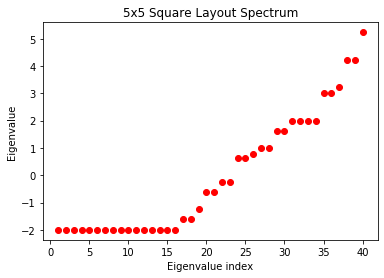

In [3]:
plt.plot(range(1, len(w5) + 1), np.sort(np.real(w5)), 'ro')
plt.xlabel('Eigenvalue index')
plt.ylabel('Eigenvalue')
plt.title('5x5 Square Layout Spectrum')
#plt.rcParams["figure.figsize"] = [16,9]
plt.show()

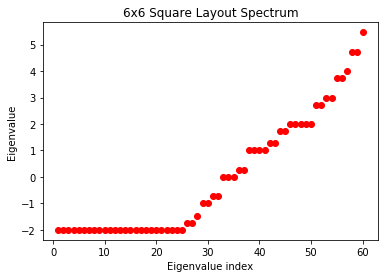

In [4]:
g6 = nx.grid_graph([6,6])
g6_line = nx.line_graph(g6)
w6, v6 = la.eig(np.array(nx.adjacency_matrix(g6_line).todense()))
plt.plot(range(1, len(w6) + 1), np.sort(np.real(w6)), 'ro')
plt.xlabel('Eigenvalue index')
plt.ylabel('Eigenvalue')
plt.title('6x6 Square Layout Spectrum')
#plt.rcParams["figure.figsize"] = [16,9]
plt.show()

In [3]:
def spec_square(n):
    g = nx.grid_graph([n,n])
    g_line = nx.line_graph(g)
    w, v = la.eig(np.array(nx.adjacency_matrix(g_line).todense()))
    plt.plot(range(1, len(w) + 1), np.sort(np.real(w)), 'ro')
    plt.xlabel('Eigenvalue index')
    plt.ylabel('Eigenvalue')
    plt.title(str(n) + 'x' + str(n) + ' Square Layout Spectrum')
    #plt.rcParams["figure.figsize"] = [16,9]
    plt.show()
    return w, v
    
def spec_hex(n):
    g = nx.hexagonal_lattice_graph(n,n)
    g_line = nx.line_graph(g)
    w, v = la.eig(np.array(nx.adjacency_matrix(g_line).todense()))
    plt.plot(range(1, len(w) + 1), np.sort(np.real(w)), 'ro')
    plt.xlabel('Eigenvalue index')
    plt.ylabel('Eigenvalue')
    plt.title(str(n) + 'x' + str(n) + ' Hexagonal Layout Spectrum')
    #plt.rcParams["figure.figsize"] = [16,9]
    plt.show()
    return w, v

def spec(g, n):
    w, v = la.eig(np.array(nx.adjacency_matrix(g).todense()))
    plt.plot(range(1, len(w) + 1), np.sort(np.real(w)), 'ro')
    plt.xlabel('Eigenvalue index')
    plt.ylabel('Eigenvalue')
    plt.title(str(n) + 'x' + str(n) + ' Square Layout Spectrum, One Coupling Changed')
    #plt.rcParams["figure.figsize"] = [16,9]
    plt.show()
    return w, v

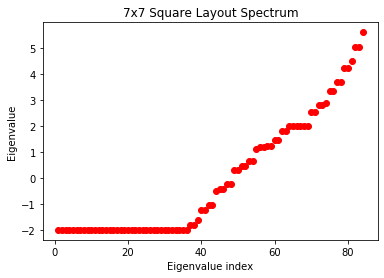

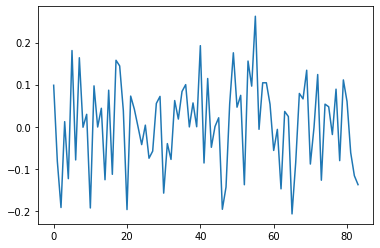

In [38]:
w, v = spec_square(7)
plt.plot(range(0, len(v[34])), np.real(v[34]))

In [18]:
print(v5[22])
print(w5[22])

[-2.17625090e-01 -1.58113883e-01  8.52647989e-02  2.86072150e-01
  1.58113883e-01 -5.77350269e-02  1.28617545e-01  2.68999405e-01
  2.48843718e-02  5.13743148e-02 -1.66250775e-01  3.08682152e-02
 -1.11364470e-01 -5.07197864e-02 -2.68999405e-01 -2.57441219e-02
 -1.66250775e-01 -1.31354690e-02 -7.45355992e-02  1.63837312e-01
 -4.03897132e-02 -1.78410678e-01  1.77524477e-02 -7.43497239e-16
 -5.28017987e-02 -1.47997196e-01 -1.22066916e-01  3.36537781e-01
 -2.14901474e-02 -1.32207904e-01  3.26563706e-01 -5.25537220e-02
 -7.57697191e-02 -4.37860833e-01  2.80653959e-01 -3.80313662e-01
  1.00490000e-01  1.62679769e-01 -2.25448030e-01 -3.62589403e-02]
-2.0000000000000004


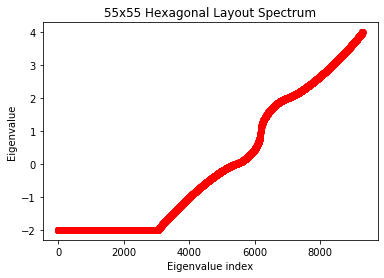

In [23]:
spec_hex(55)

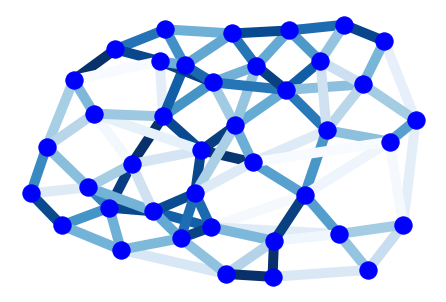

In [42]:
# generate random weights for 5x5 square lattice
g = nx.grid_graph([5,5])
g_line = nx.line_graph(g)
edge_list = [e for e in g_line.edges]
edge_list[3][0]
g_line[edge_list[0][0]][edge_list[0][1]]['weight'] = 0.5
for i in range(0, len(edge_list)):
    g_line[edge_list[i][0]][edge_list[i][1]]['weight'] = np.random.uniform(0,1)
    
edges,weights = zip(*nx.get_edge_attributes(g_line,'weight').items())
pos = nx.spring_layout(g_line)
nx.draw(g_line, pos, node_color='b', edgelist=edges, edge_color=weights, width=10.0, edge_cmap=plt.cm.Blues)

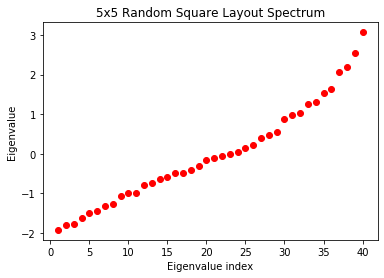

(array([ 3.07043576,  2.54109873,  2.18791554,  2.05806719,  1.64692289,
         1.5424016 , -1.91977037,  1.31460438,  1.24809355,  1.04176038,
         0.98265341,  0.87973154, -1.79931772, -1.76614306, -1.60731522,
        -1.48970739, -1.44152936, -1.3224862 , -1.25709439,  0.5621137 ,
         0.46632011,  0.39968803, -1.06102312, -1.00036732, -0.98393856,
         0.23492191,  0.15544437,  0.05256399,  0.00737058, -0.05513591,
        -0.11307896, -0.15426308, -0.30487384, -0.77520345, -0.73704926,
        -0.62683478, -0.58336218, -0.417206  , -0.48119682, -0.49521066]),
 array([[-0.12089148,  0.15531284,  0.20535488, ..., -0.04876913,
         -0.10479779,  0.09550619],
        [-0.27264209,  0.27703805,  0.05287641, ...,  0.19458412,
          0.10058972, -0.04919606],
        [-0.27865377,  0.2382975 , -0.2974345 , ..., -0.24423132,
          0.05829486, -0.00088802],
        ...,
        [-0.09777883,  0.02973243,  0.10803773, ...,  0.25479453,
          0.01986738, -0.1343

In [76]:
spec(g_line, 5)

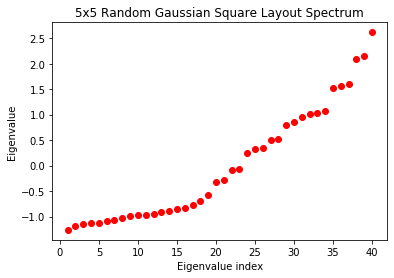

(array([ 2.61678129,  2.15240151,  2.08433439,  1.59920045,  1.56101126,
         1.52187616,  1.07103551,  1.03698177,  1.01562621,  0.95014672,
         0.86222203,  0.78706125,  0.52835388,  0.49779832,  0.32698045,
         0.35275903,  0.24521276, -0.06288338, -0.0942706 , -0.27927736,
        -0.33126773, -0.57165236, -0.69360123, -1.2620493 , -0.77746726,
        -1.18462475, -0.82835484, -0.84244235, -1.15044774, -1.1254797 ,
        -1.12009397, -1.08954163, -1.06051788, -1.02738927, -0.90009762,
        -0.91816118, -0.9958374 , -0.95316097, -0.97420653, -0.96695797]),
 array([[-0.13101567, -0.22047454,  0.12004154, ..., -0.23169491,
         -0.26157822, -0.02618815],
        [-0.19801685, -0.19331746,  0.18725779, ...,  0.04137962,
         -0.08745844, -0.04638891],
        [-0.21669894,  0.029637  ,  0.2530021 , ...,  0.14427985,
          0.10821412, -0.17156865],
        ...,
        [-0.15591875, -0.23642493, -0.08193387, ...,  0.08246283,
          0.0954476 ,  0.3200

In [86]:
# generate gaussian weights for 5x5 square lattice
g = nx.grid_graph([5,5])
g_line = nx.line_graph(g)
edge_list = [e for e in g_line.edges]
for i in range(0, len(edge_list)):
    g_line[edge_list[i][0]][edge_list[i][1]]['weight'] = np.random.normal(0.5,0.1)

spec(g_line, 5)

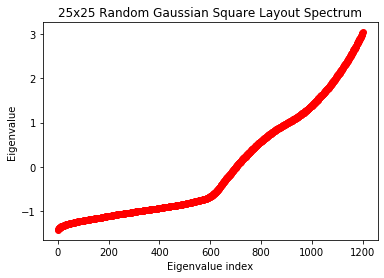

(array([ 3.0377641 ,  3.0148029 ,  2.99517173, ..., -0.94884599,
        -0.94599745, -0.9458921 ]),
 array([[ 0.0483709 ,  0.0069291 ,  0.03915174, ...,  0.00019495,
          0.00197269,  0.00045871],
        [ 0.04266493,  0.00591568,  0.03884419, ..., -0.01141929,
         -0.005938  ,  0.00322694],
        [ 0.02747407, -0.01758463, -0.04194682, ..., -0.01922702,
          0.00846727,  0.02275851],
        ...,
        [ 0.00064128,  0.00042305,  0.00112895, ..., -0.05618878,
         -0.02165648, -0.02713645],
        [ 0.00033972,  0.00039168, -0.00386228, ...,  0.02484705,
         -0.00236645,  0.0091448 ],
        [ 0.00010791,  0.00012478, -0.00125551, ...,  0.00744414,
         -0.01188702,  0.00944252]]))

In [87]:
# generate gaussian weights for 25x25 square lattice
g = nx.grid_graph([25,25])
g_line = nx.line_graph(g)
edge_list = [e for e in g_line.edges]
for i in range(0, len(edge_list)):
    g_line[edge_list[i][0]][edge_list[i][1]]['weight'] = np.random.normal(0.5,0.1)

spec(g_line, 25)

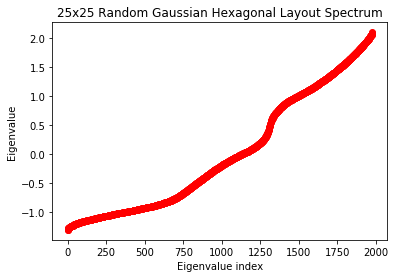

(array([ 2.09667567,  2.0883173 ,  2.07454217, ..., -0.94508443,
        -0.94506102, -0.9406745 ]),
 array([[-9.44196939e-03, -1.26280949e-03,  1.53143384e-04, ...,
          1.67780892e-03, -1.78533360e-03, -2.29389669e-04],
        [-5.90520372e-03, -8.11836296e-04,  1.03657034e-04, ...,
          3.54540675e-03, -3.19744617e-03, -1.41176418e-02],
        [-3.62890980e-04, -4.54595549e-05,  1.86220530e-05, ...,
         -5.51427603e-04,  5.27377245e-04,  1.22585839e-02],
        ...,
        [-3.50784148e-07, -6.01008839e-08,  1.30569434e-07, ...,
          8.10963726e-04, -8.03876967e-04, -7.72165765e-04],
        [-4.80049490e-04,  3.95687966e-05, -1.29055196e-05, ...,
         -5.11484385e-04, -7.59242178e-04, -6.27222585e-03],
        [-8.15302932e-05, -1.16793378e-05,  1.29134076e-05, ...,
          1.37625948e-02, -1.21455525e-02, -4.24092611e-02]]))

In [89]:
# same but for hexagonal lattice
# generate gaussian weights for 25x25 hexagonal lattice
g = nx.hexagonal_lattice_graph(25,25)
g_line = nx.line_graph(g)
edge_list = [e for e in g_line.edges]
for i in range(0, len(edge_list)):
    g_line[edge_list[i][0]][edge_list[i][1]]['weight'] = np.random.normal(0.5,0.1)

spec(g_line, 25)

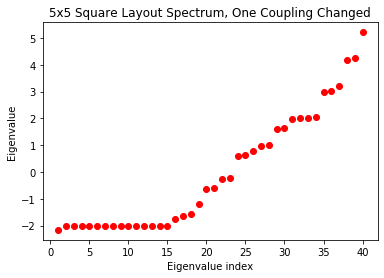

D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


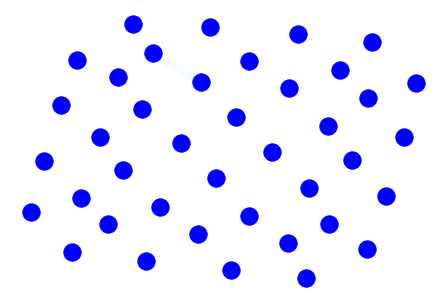

In [7]:
# 5x5 square lattice with one coupling changed
g = nx.grid_graph([5,5])
g_line = nx.line_graph(g)
edge_list = [e for e in g_line.edges]
g_line[edge_list[0][0]][edge_list[0][1]]['weight'] = 0.5
spec(g_line, 5)
edges,weights = zip(*nx.get_edge_attributes(g_line,'weight').items())
pos = nx.spring_layout(g_line)
nx.draw(g_line, pos, node_color='b', edgelist=edges, edge_color=weights, width=10.0, edge_cmap=plt.cm.Blues)

In [6]:
# Gaussian lattice from a node
def gaussian(x, mu, sig):
    return 1/(sig*(np.pi)**.5)*np.exp(-0.5*((x-mu)/sig)**2)

# generate gaussian weights for 2x2 square lattice
g = nx.grid_graph([2,2])
g_line = nx.line_graph(g)
print(nx.shortest_path(g_line, source=((0,1), (1,1))))

{((0, 1), (1, 1)): [((0, 1), (1, 1))], ((1, 0), (1, 1)): [((0, 1), (1, 1)), ((1, 0), (1, 1))], ((0, 0), (0, 1)): [((0, 1), (1, 1)), ((0, 0), (0, 1))], ((0, 0), (1, 0)): [((0, 1), (1, 1)), ((1, 0), (1, 1)), ((0, 0), (1, 0))]}


In [13]:
# outline for gaussian lattice from a node function
# specify mean node, mean, sig 
# generate dict of shortest paths from the mean node
# for each shortest path key:
#    assign weight between adjacent nodes in the key's value by calling gaussian with x being the distance from the mean node

# generate gaussian weights for 2x2 square lattice
g = nx.grid_graph([2,2])
s = ((0,1), (1,1))
mu = 1
sig = 0.1
g_line = nx.line_graph(g)
paths = nx.shortest_path(g_line, source=s)
for key in paths:
    path_length = 0.1
    source = key
    for node in paths[key][1:]:
        g_line[source][node]['weight'] = gaussian(mu + path_length, mu, sig)
        source = node
        path_length += 0.1

edges,weights = zip(*nx.get_edge_attributes(g_line,'weight').items())
pos = nx.spring_layout(g_line)
nx.draw(g_line, pos, node_color='b', edgelist=edges, edge_color=weights, width=10.0, edge_cmap=plt.cm.Blues)
        

KeyError: ((1, 0), (1, 1))